In [16]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Loading the dataset
dataloc = 'Cryotherapy.xlsx'
data = pd.read_excel(dataloc)

# Separate features and target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Function to train, evaluate, and collect accuracy for different models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    return accuracy, class_report

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM (Linear)': SVC(kernel='linear'),
    'SVM (Polynomial)': SVC(kernel='poly'),
    'SVM (RBF)': SVC(kernel='rbf'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME'),
    'Gradient Boosting': GradientBoostingClassifier()
}

results= []

# Part 1: Models with Feature Scaling
# -----------------------------------

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluate models with scaled features
accuracies_scaling = []
reports_scaling = []
for name, model in models.items():
    accuracy, report = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    accuracies_scaling.append(accuracy)
    reports_scaling.append(report)
    results.append({'Model': name, '': 'Accuracy With Scaling', 'Accuracy': accuracy})
    print(f'With Scaling - {name}: Accuracy = {accuracy}\nClassification Report:\n{classification_report(y_test, model.predict(X_test_scaled), zero_division=0)}\n')

print("_"*200)
print("\n")

# Part 2: Models without Feature Scaling
# --------------------------------------

# Evaluate models without scaling features
accuracies_no_scaling = []
reports_no_scaling = []
for name, model in models.items():
    accuracy, report = evaluate_model(model, X_train, X_test, y_train, y_test)
    accuracies_no_scaling.append(accuracy)
    reports_no_scaling.append(report)
    results.append({'Model': name, '': 'Accuracy Without Scaling', 'Accuracy': accuracy})
    print(f'Without Scaling - {name}: Accuracy = {accuracy}\nClassification Report:\n{classification_report(y_test, model.predict(X_test), zero_division=0)}\n')

print("_"*200)
print("\n")




With Scaling - Logistic Regression: Accuracy = 0.8695652173913043
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.90      0.82      0.86        11

    accuracy                           0.87        23
   macro avg       0.87      0.87      0.87        23
weighted avg       0.87      0.87      0.87        23


With Scaling - SVM (Linear): Accuracy = 0.8695652173913043
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.90      0.82      0.86        11

    accuracy                           0.87        23
   macro avg       0.87      0.87      0.87        23
weighted avg       0.87      0.87      0.87        23


With Scaling - SVM (Polynomial): Accuracy = 0.7391304347826086
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.5

                     Accuracy With Scaling  Accuracy Without Scaling
Model                                                               
AdaBoost                          0.826087                  0.826087
Decision Tree                     0.826087                  0.826087
Gradient Boosting                 0.826087                  0.826087
Logistic Regression               0.869565                  0.869565
Random Forest                     0.826087                  0.826087
SVM (Linear)                      0.869565                  0.869565
SVM (Polynomial)                  0.739130                  0.478261
SVM (RBF)                         0.913043                  0.521739


________________________________________________________________________________________________________________________________________________________________________________________________________


Feature scaling generally has improved the performance of the models.

SVM (Using RBF kernal) seems to ye

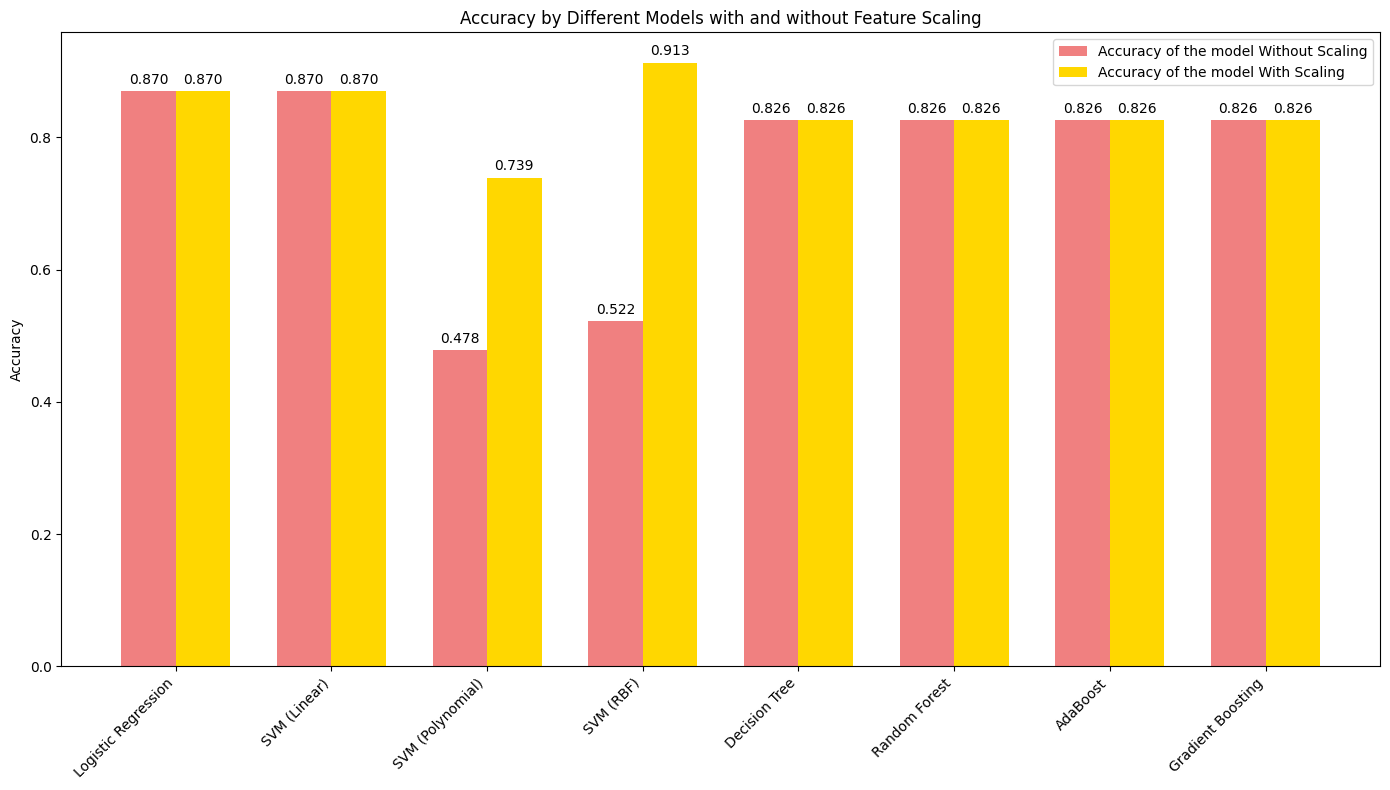

In [12]:
# Convert results list to DataFrame
results_df = pd.DataFrame(results)

# Pivot the DataFrame to get a matrix-like table
pivot_df = results_df.pivot(index='Model', columns='', values='Accuracy')

# Display the results table
print(pivot_df)

print("\n")
print("_"*200)
print("\n")

print("Feature scaling generally has improved the performance of the models.\n")
print("SVM (Using RBF kernal) seems to yeild the best prediction with an accuracy of 91.3043%\n")


# Visualization of Results
# ------------------------

# List of model names
model_names = list(models.keys())

# Define x locations for the groups
x = np.arange(len(model_names))
width = 0.35  # width of the bars

# Create a bar chart to compare accuracies
fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, accuracies_no_scaling, width, label='Accuracy of the model Without Scaling', color='lightcoral')
rects2 = ax.bar(x + width/2, accuracies_scaling, width, label='Accuracy of the model With Scaling' , color='gold')

# Add labels, title, and legend
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Different Models with and without Feature Scaling')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha="right")
ax.legend()

# Function to annotate bars with values
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Annotate bars
autolabel(rects1)
autolabel(rects2)

# Adjust layout and show plot
fig.tight_layout()
plt.show()



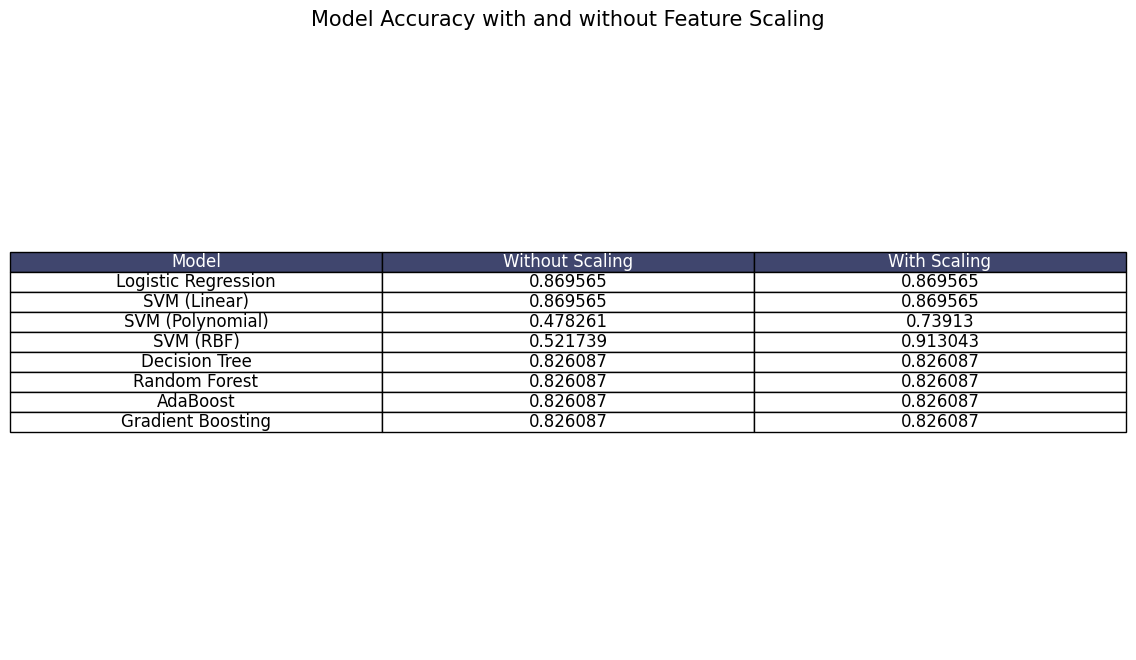

In [17]:
#  data from results
data = {
    'Model': ['Logistic Regression', 'SVM (Linear)', 'SVM (Polynomial)', 'SVM (RBF)', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting'],
    'Without Scaling': [0.869565, 0.869565, 0.478261, 0.521739, 0.826087, 0.826087, 0.826087, 0.826087],
    'With Scaling': [0.869565, 0.869565, 0.739130, 0.913043, 0.826087, 0.826087, 0.826087, 0.826087]
}

# Create DataFrame
tbl = pd.DataFrame(data)

# Create a table to display accuracies
fig, ax = plt.subplots(figsize=(12, 8))

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create a table
table = ax.table(cellText=tbl.values, colLabels=tbl.columns, cellLoc='center', loc='center', colColours=['#f5f5f5']*3)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Set the color of the header
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_facecolor('#40466e')
        cell.set_text_props(color='w')

plt.title('Model Accuracy with and without Feature Scaling', size=15)
plt.show()
